In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(9991, 28)
(9991, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where FL/RR are swinging
idxs = np.where(X_relative_footsteps_acc[:, 24] == 1)[0]
X_relative_footsteps_acc_RR_swing = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RR_swing = Y_relative_footsteps_acc[idxs]

## Predict FL foot -> x

In [8]:
X_relative_footsteps_acc_RR_swing[0, :]

array([ 0.        ,  0.        , -0.1       ,  0.03223521, -0.16707049,
        0.01633024, -0.05086472,  0.01613139, -0.08244775,  0.22421836,
        0.2146329 , -0.40479645,  0.23125328, -0.18591964, -0.40580276,
       -0.2571617 ,  0.15356685, -0.40042184, -0.2596469 , -0.13334387,
       -0.40039383,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_acc_RR_swing[0, :]

array([ 0.22407743,  0.18885393,  0.23964177, -0.19926585, -0.26746292,
        0.12131841, -0.25399354, -0.15574807])

### Linear Regression

In [29]:
# Input
X = np.hstack((X_relative_footsteps_acc_RR_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RR_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RR_swing[:, 6]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_x = LinearRegression()

# Fit the model
model_rr_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.8680296494864197
RMSE:  0.010333714825658908
The lowest error is:  6.119792763326082e-06
The highest error is:  0.06555838238631792
The avg. error is:  0.00603084286968355


In [30]:
model_rr_relative_swinging_x.coef_

array([[-0.02134778,  0.00962076, -0.07616273,  0.10682787,  0.0029621 ,
        -0.03129208,  0.15666368,  0.02096288, -0.47364619,  0.11515189,
         0.67809416, -0.14882832,  0.00914182, -0.1072847 ]])

In [31]:
model_rr_relative_swinging_x.intercept_

array([0.01804047])

Text(0, 0.5, 'Predictions')

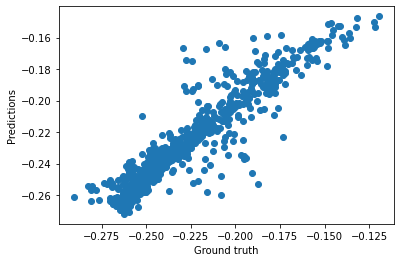

In [32]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [33]:
#%store model_rr_relative_swinging_x

In [34]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [35]:
# Save model
#joblib.dump(model_rr_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_x.sav")

### Predict RR foot -> y

In [41]:
# Input
X = np.hstack((X_relative_footsteps_acc_RR_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RR_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RR_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RR_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RR_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RR_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RR_swing[:, 7]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rr_relative_swinging_y = LinearRegression()

# Fit the model
model_rr_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rr_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9291350759067503
RMSE:  0.005727163062757913
The lowest error is:  1.6896503861330014e-06
The highest error is:  0.052061792277737134
The avg. error is:  0.002768167683043514


In [42]:
model_rr_relative_swinging_y.coef_

array([[ 6.98101958e-03,  4.73192421e-03, -3.19915092e-04,
        -8.20540301e-04,  1.04839444e-01, -3.48351020e-02,
         5.53468413e-02, -6.26723480e-02, -1.04997800e-01,
         8.28620311e-02,  5.13417282e-02, -5.72303716e-02,
        -4.35806227e-02,  5.09121178e-01]])

In [43]:
model_rr_relative_swinging_y.intercept_

array([-0.03629735])

Text(0, 0.5, 'Predictions')

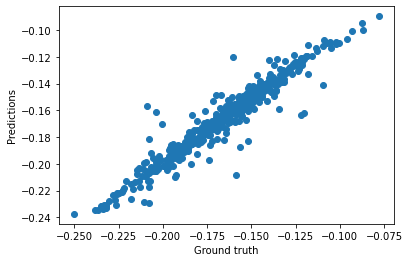

In [44]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [38]:
#%store model_rr_relative_swinging_y

In [30]:
#for idx, prediction in enumerate(predictions):
#    print(f'Input: {X_test[idx]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [31]:
# Save model
#joblib.dump(model_rr_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rr_relative_swinging_y.sav")